# Vader

In [ ]:
# Why Vader - VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analysis tool specifically designed to work with short text, 
# such as tweets, reviews, and social media comments.
✅ It’s pretrained and rule-based (no need for training data)
✅ It understands social media language, emojis, capitalization, and punctuation
✅ It’s fast and efficient, making it perfect for real-time sentiment analysis
# Vader is part of the NLTK (Natural Language Toolkit), not a standalone package

# Libraries

pandas → Handles data loading, cleaning, and manipulation (CSV files, DataFrames).
re (Regular Expressions) → Cleans text by removing URLs, mentions (@), hashtags, and special characters.
matplotlib.pyplot → Visualizes sentiment distribution using bar charts.
nltk → Provides VADER sentiment analysis and NLP tools like tokenization and lemmatization.


In [42]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Load datasets
file_harris = "C:/Users/gianm/OneDrive/Desktop/BABSON/2nd semester/Python/data/harris.csv"
file_trump = "C:/Users/gianm/OneDrive/Desktop/BABSON/2nd semester/Python/data/trump.csv"

df_harris = pd.read_csv(file_harris)
df_trump = pd.read_csv(file_trump)

# Data Cleaning

1. Drop Irrelevant Columns
2. Remove special characters, numbers, and links (e.g., URLs, mentions, hashtags)
3. Remove stop words (common words like "the", "is", "and", etc.)
4. Apply lemmatization (convert words to their base form, e.g., "running" → "run")


# Script

In [44]:
# Function to clean text with additional lemmatization
def clean_text_advanced(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)  # Remove special characters & numbers
    text = " ".join(text.split())  # Remove extra spaces
    return text

# Apply text cleaning
df_harris['Cleaned_Tweet'] = df_harris['Tweet'].apply(clean_text_advanced)
df_trump['Cleaned_Tweet'] = df_trump['Tweet'].apply(clean_text_advanced)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gianm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


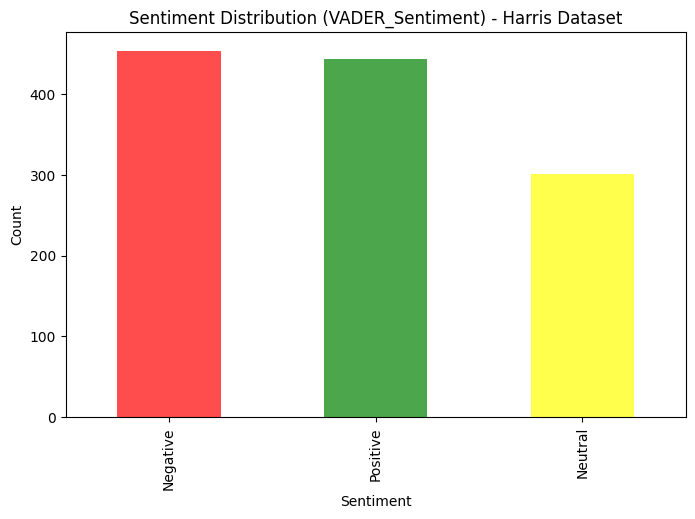

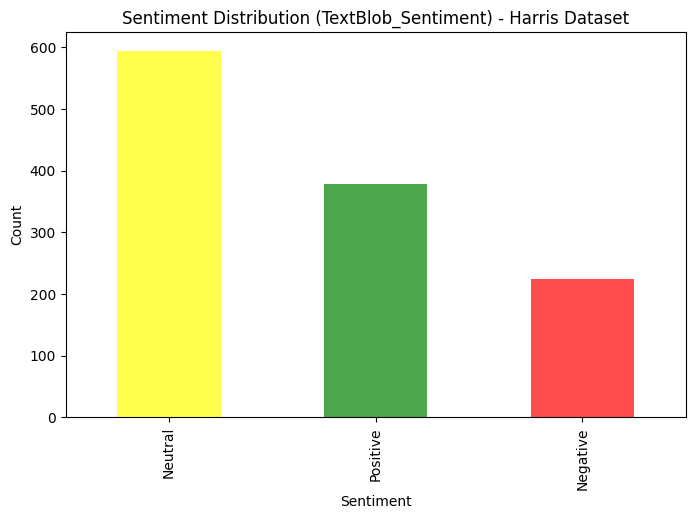

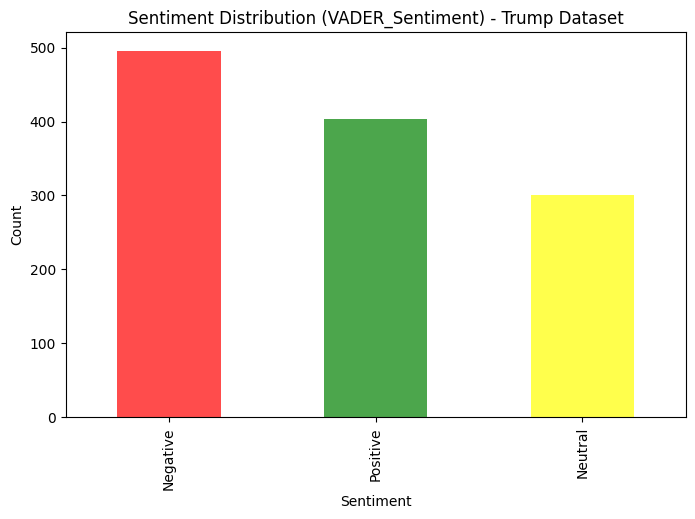

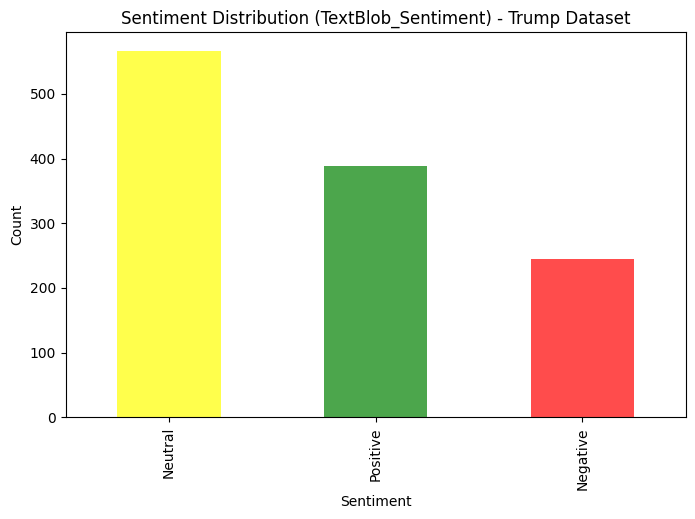

                                       Cleaned_Tweet  VADER_Score  \
0  rt kamala openly brags about dumping haitian m...       0.1027   
1  rt wbna superstar brittney griner wore a kamal...       0.3400   
2  rt breaking google growth strategist exposes g...      -0.0258   
3  rt wow if you love animals like i do you must ...       0.9201   
4  rt predictit has flipped for trump harris has ...       0.4588   

   TextBlob_Score VADER_Sentiment TextBlob_Sentiment  
0             0.0        Positive            Neutral  
1            -0.4        Positive           Negative  
2             0.0         Neutral            Neutral  
3             0.3        Positive           Positive  
4             0.5        Positive           Positive  
                                       Cleaned_Tweet  VADER_Score  \
0  rt trump is going to lie at the debate a lot h...      -0.4215   
1  rt for taylor swift talking about palestine is...      -0.6908   
2  rt breaking trump bragged to bob woodward tha

In [51]:
# Download necessary NLTK data (only required once)
nltk.download('vader_lexicon')
# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis
def get_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Function to apply TextBlob sentiment analysis
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df_harris['VADER_Score'] = df_harris['Cleaned_Tweet'].apply(get_vader_sentiment)
df_harris['TextBlob_Score'] = df_harris['Cleaned_Tweet'].apply(get_textblob_sentiment)
df_trump['VADER_Score'] = df_trump['Cleaned_Tweet'].apply(get_vader_sentiment)
df_trump['TextBlob_Score'] = df_trump['Cleaned_Tweet'].apply(get_textblob_sentiment)

# Classify sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df_harris['VADER_Sentiment'] = df_harris['VADER_Score'].apply(classify_sentiment)
df_harris['TextBlob_Sentiment'] = df_harris['TextBlob_Score'].apply(classify_sentiment)
df_trump['VADER_Sentiment'] = df_trump['VADER_Score'].apply(classify_sentiment)
df_trump['TextBlob_Sentiment'] = df_trump['TextBlob_Score'].apply(classify_sentiment)

# Plot sentiment distribution with correct color mapping
def plot_sentiment_distribution(df, sentiment_col, title):
    color_map = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'yellow'}
    sentiment_counts = df[sentiment_col].value_counts()
    colors = [color_map[sentiment] for sentiment in sentiment_counts.index]
    
    plt.figure(figsize=(8, 5))
    sentiment_counts.plot(kind='bar', alpha=0.7, color=colors)
    plt.title(f"Sentiment Distribution ({sentiment_col}) - {title}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

# Visualize results
plot_sentiment_distribution(df_harris, "VADER_Sentiment", "Harris Dataset")
plot_sentiment_distribution(df_harris, "TextBlob_Sentiment", "Harris Dataset")
plot_sentiment_distribution(df_trump, "VADER_Sentiment", "Trump Dataset")
plot_sentiment_distribution(df_trump, "TextBlob_Sentiment", "Trump Dataset")

# Display sample results
print(df_harris[['Cleaned_Tweet', 'VADER_Score', 'TextBlob_Score', 'VADER_Sentiment', 'TextBlob_Sentiment']].head())
3print(df_trump[['Cleaned_Tweet', 'VADER_Score', 'TextBlob_Score', 'VADER_Sentiment', 'TextBlob_Sentiment']].head())



# Comparing Vader and TextBlob

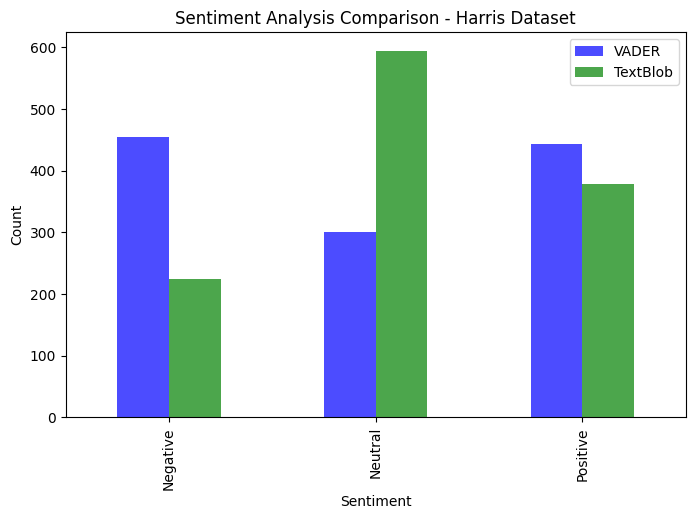

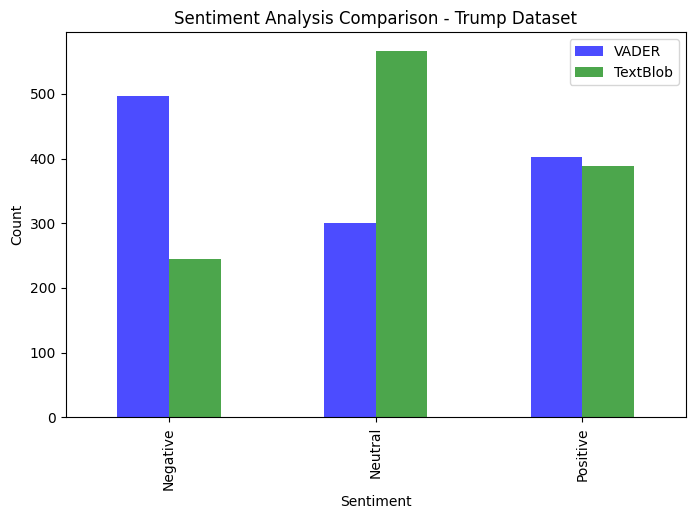

In [55]:
def plot_sentiment_comparison(df, title):
    sentiment_counts = pd.DataFrame({
        'VADER': df['VADER_Sentiment'].value_counts(),
        'TextBlob': df['TextBlob_Sentiment'].value_counts()
    })
    
    color_map = {'Positive': 'green', 'Negative': 'blue', 'Neutral': 'green'}
    colors = [color_map[sentiment] for sentiment in sentiment_counts.index]
    
    sentiment_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7, color=colors)
    plt.title(f"Sentiment Analysis Comparison - {title}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

# Plot comparison for both datasets
plot_sentiment_comparison(df_harris, "Harris Dataset")
plot_sentiment_comparison(df_trump, "Trump Dataset")


# Key Takeaways

VADER is aggressive in detecting negativity (captures sarcasm, negation, and strong words).
TextBlob skews toward neutral (less sensitive to negations, punctuation, and context).
VADER works better for social media sentiment analysis, while TextBlob is better for analyzing longer, formal texts.

C:\Users\gianm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gianm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


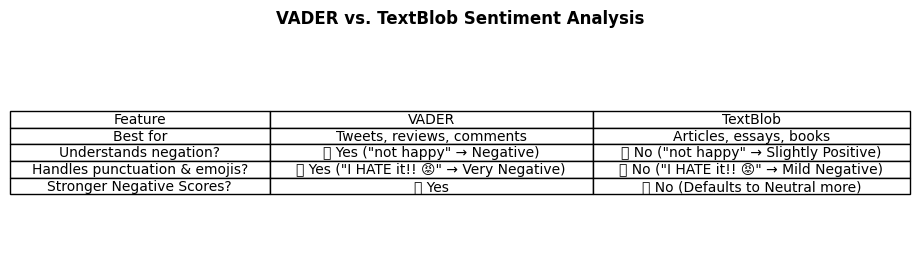

<Figure size 640x480 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
# Define table data
data = [
    ["Best for", "Tweets, reviews, comments", "Articles, essays, books"],
    ["Understands negation?", "✅ Yes (\"not happy\" → Negative)", "❌ No (\"not happy\" → Slightly Positive)"],
    ["Handles punctuation & emojis?", "✅ Yes (\"I HATE it!! 😡\" → Very Negative)", "❌ No (\"I HATE it!! 😡\" → Mild Negative)"],
    ["Stronger Negative Scores?", "✅ Yes", "❌ No (Defaults to Neutral more)"]
]

# Define column labels
columns = ["Feature", "VADER", "TextBlob"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 3))  # Adjust size as needed
ax.set_axis_off()  # Hide axis

# Create table
table = ax.table(cellText=data, colLabels=columns, cellLoc='center', loc='center')

# Adjust style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2])

# Display table
plt.title("VADER vs. TextBlob Sentiment Analysis", fontsize=12, fontweight="bold", pad=10)
plt.show()

# Save table as an image
plt.savefig("vader_vs_textblob.png", dpi=300, bbox_inches="tight")


# Hashtag Analysis

In [76]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter

# Function to extract hashtags from tweets
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

# Function to check if hashtags match tweet content
def classify_hashtag_relevance(tweet, hashtags):
    tweet_words = set(re.findall(r'\b\w+\b', tweet.lower()))
    relevant = []
    clickbait = []
    
    for hashtag in hashtags:
        hashtag_word = hashtag[1:].lower()  # Remove '#' symbol
        if hashtag_word in tweet_words:
            relevant.append(hashtag)
        else:
            clickbait.append(hashtag)
    
    return relevant, clickbait

# Load datasets
file_harris = "C:/Users/gianm/OneDrive/Desktop/BABSON/2nd semester/Python/data/harris.csv"
file_trump = "C:/Users/gianm/OneDrive/Desktop/BABSON/2nd semester/Python/data/trump.csv"

df_harris = pd.read_csv(file_harris)
df_trump = pd.read_csv(file_trump)

# Extract hashtags
df_harris['Hashtags'] = df_harris['Tweet'].apply(extract_hashtags)
df_trump['Hashtags'] = df_trump['Tweet'].apply(extract_hashtags)

# Classify hashtags
df_harris[['Relevant_Hashtags', 'Clickbait_Hashtags']] = df_harris.apply(
    lambda row: classify_hashtag_relevance(row['Tweet'], row['Hashtags']), axis=1, result_type='expand')
df_trump[['Relevant_Hashtags', 'Clickbait_Hashtags']] = df_trump.apply(
    lambda row: classify_hashtag_relevance(row['Tweet'], row['Hashtags']), axis=1, result_type='expand')

# Function to get top 10 hashtags and display clearly
def get_top_hashtags(df, title):
    all_hashtags = [hashtag for hashtags in df['Hashtags'] for hashtag in hashtags]
    top_hashtags = Counter(all_hashtags).most_common(10)
    
    print(f"Top 10 Hashtags - {title}")
    for i, (hashtag, count) in enumerate(top_hashtags, 1):
        print(f"{i}. {hashtag} - {count} times")
    print("\n")

# Function to get top 10 clickbait hashtags and display clearly
def get_top_clickbait_hashtags(df, title):
    all_clickbait_hashtags = [hashtag for hashtags in df['Clickbait_Hashtags'] for hashtag in hashtags]
    top_clickbait_hashtags = Counter(all_clickbait_hashtags).most_common(10)
    
    print(f"Top 10 Clickbait Hashtags - {title}")
    for i, (hashtag, count) in enumerate(top_clickbait_hashtags, 1):
        print(f"{i}. {hashtag} - {count} times")
    print("\n")

# Display top hashtags and clickbait hashtags clearly
get_top_hashtags(df_harris, "Harris Dataset")
get_top_hashtags(df_trump, "Trump Dataset")




Top 10 Hashtags - Harris Dataset
1. #Debate2024 - 4 times
2. #kamala - 3 times
3. #harris - 2 times
4. #OPINION - 2 times
5. #Kamala - 2 times
6. #Debatenight - 2 times
7. #debate - 2 times
8. #Harris - 2 times
9. #trump - 2 times
10. #texas - 2 times


Top 10 Hashtags - Trump Dataset
1. #Trump - 9 times
2. #Debate2024 - 8 times
3. #MAGA - 4 times
4. #CatsForTrump - 3 times
5. #KamalaHarris - 3 times
6. #PresidentialDebate2024 - 3 times
7. #TrumpPedoFiles - 2 times
8. #DonaldTrump - 2 times
9. #PresidentialDebate - 2 times
10. #trump - 2 times




In [78]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter

# Function to extract hashtags from tweets
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

# Function to extract mentions from tweets
def extract_mentions(text):
    return re.findall(r'@\w+', text)

# Function to check if hashtags match tweet content
def classify_hashtag_relevance(tweet, hashtags):
    tweet_words = set(re.findall(r'\b\w+\b', tweet.lower()))
    relevant = []
    clickbait = []
    
    for hashtag in hashtags:
        hashtag_word = hashtag[1:].lower()  # Remove '#' symbol
        if hashtag_word in tweet_words:
            relevant.append(hashtag)
        else:
            clickbait.append(hashtag)
    
    return relevant, clickbait

# Load datasets
file_harris = "C:/Users/gianm/OneDrive/Desktop/BABSON/2nd semester/Python/data/harris.csv"
file_trump = "C:/Users/gianm/OneDrive/Desktop/BABSON/2nd semester/Python/data/trump.csv"

df_harris = pd.read_csv(file_harris)
df_trump = pd.read_csv(file_trump)

# Extract hashtags and mentions
df_harris['Hashtags'] = df_harris['Tweet'].apply(extract_hashtags)
df_trump['Hashtags'] = df_trump['Tweet'].apply(extract_hashtags)
df_harris['Mentions'] = df_harris['Tweet'].apply(extract_mentions)
df_trump['Mentions'] = df_trump['Tweet'].apply(extract_mentions)

# Classify hashtags
df_harris[['Relevant_Hashtags', 'Clickbait_Hashtags']] = df_harris.apply(
    lambda row: classify_hashtag_relevance(row['Tweet'], row['Hashtags']), axis=1, result_type='expand')
df_trump[['Relevant_Hashtags', 'Clickbait_Hashtags']] = df_trump.apply(
    lambda row: classify_hashtag_relevance(row['Tweet'], row['Hashtags']), axis=1, result_type='expand')

# Function to get top 10 hashtags and display clearly
def get_top_hashtags(df, title):
    all_hashtags = [hashtag for hashtags in df['Hashtags'] for hashtag in hashtags]
    top_hashtags = Counter(all_hashtags).most_common(10)
    
    print(f"Top 10 Hashtags - {title}")
    for i, (hashtag, count) in enumerate(top_hashtags, 1):
        print(f"{i}. {hashtag} - {count} times")
    print("\n")

# Function to get top 10 clickbait hashtags and display clearly
def get_top_clickbait_hashtags(df, title):
    all_clickbait_hashtags = [hashtag for hashtags in df['Clickbait_Hashtags'] for hashtag in hashtags]
    top_clickbait_hashtags = Counter(all_clickbait_hashtags).most_common(10)
    
    print(f"Top 10 Clickbait Hashtags - {title}")
    for i, (hashtag, count) in enumerate(top_clickbait_hashtags, 1):
        print(f"{i}. {hashtag} - {count} times")
    print("\n")

# Function to find most mentioned users excluding Trump and Kamala
def get_most_mentioned_users(df, title):
    all_mentions = [mention.lower() for mentions in df['Mentions'] for mention in mentions]
    filtered_mentions = [mention for mention in all_mentions if mention not in ['@trump', '@kamala']]
    top_mentions = Counter(filtered_mentions).most_common(1)
    
    print(f"Most Mentioned User (excluding Trump and Kamala) - {title}:")
    if top_mentions:
        print(f"{top_mentions[0][0]} - {top_mentions[0][1]} times")
    else:
        print("No mentions found.")
    print("\n")

# Display top hashtags, clickbait hashtags, and most mentioned users
get_top_hashtags(df_harris, "Harris Dataset")
get_top_hashtags(df_trump, "Trump Dataset")
get_top_clickbait_hashtags(df_harris, "Harris Dataset")
get_top_clickbait_hashtags(df_trump, "Trump Dataset")
get_most_mentioned_users(df_harris, "Harris Dataset")
get_most_mentioned_users(df_trump, "Trump Dataset")


Top 10 Hashtags - Harris Dataset
1. #Debate2024 - 4 times
2. #kamala - 3 times
3. #harris - 2 times
4. #OPINION - 2 times
5. #Kamala - 2 times
6. #Debatenight - 2 times
7. #debate - 2 times
8. #Harris - 2 times
9. #trump - 2 times
10. #texas - 2 times


Top 10 Hashtags - Trump Dataset
1. #Trump - 9 times
2. #Debate2024 - 8 times
3. #MAGA - 4 times
4. #CatsForTrump - 3 times
5. #KamalaHarris - 3 times
6. #PresidentialDebate2024 - 3 times
7. #TrumpPedoFiles - 2 times
8. #DonaldTrump - 2 times
9. #PresidentialDebate - 2 times
10. #trump - 2 times


Top 10 Clickbait Hashtags - Harris Dataset
1. #SONDAKİKA - 1 times


Top 10 Clickbait Hashtags - Trump Dataset
1. #KonuHakEmekliyeİntiba - 1 times


Most Mentioned User (excluding Trump and Kamala) - Harris Dataset:
@harris_wins - 25 times


Most Mentioned User (excluding Trump and Kamala) - Trump Dataset:
@kamalaharris - 31 times




# Debate Day and the day after

Interpretation: 
Both candidates experienced more positive sentiment after the debate, meaning that public discourse may have shifted towards a more favorable tone over time.
Trump's sentiment started slightly higher than Harris's on debate day, but both ended up with similar sentiment scores on the following day.
The increase in sentiment could be due to post-debate analysis, media coverage, or reactions that framed the debate more favorably for both candidates.

C:\Users\gianm\AppData\Local\Temp\ipykernel_17816\4108474840.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TextBlob Sentiment'] = df['Tweet'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
C:\Users\gianm\AppData\Local\Temp\ipykernel_17816\4108474840.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TextBlob Sentiment'] = df['Tweet'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
C:\Users\gianm\AppData\Local\Temp\ipykernel_17816\4108474840.py:29: SettingWithCopyWarni

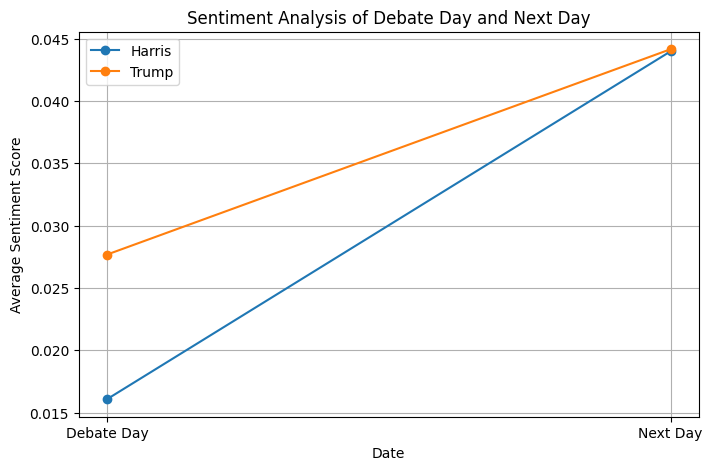

  Dataset        Date  TextBlob Sentiment
0  Harris  Debate Day            0.016077
1  Harris    Next Day            0.043979
2   Trump  Debate Day            0.027676
3   Trump    Next Day            0.044147


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load datasets
file_harris = "C:/Users/gianm/OneDrive/Desktop/BABSON/2nd semester/Python/data/harris.csv"
file_trump = "C:/Users/gianm/OneDrive/Desktop/BABSON/2nd semester/Python/data/trump.csv"

df_harris = pd.read_csv(file_harris)
df_trump = pd.read_csv(file_trump)

# Convert 'Created at' to datetime for filtering
df_harris['Created at'] = pd.to_datetime(df_harris['Created at'])
df_trump['Created at'] = pd.to_datetime(df_trump['Created at'])

# Define the debate day and the next day
debate_day = pd.to_datetime("2024-09-10").date()
next_day = pd.to_datetime("2024-09-11").date()

# Filter tweets for debate day and the next day
df_harris_debate = df_harris[df_harris['Created at'].dt.date == debate_day]
df_harris_next_day = df_harris[df_harris['Created at'].dt.date == next_day]

df_trump_debate = df_trump[df_trump['Created at'].dt.date == debate_day]
df_trump_next_day = df_trump[df_trump['Created at'].dt.date == next_day]

# Function to analyze sentiment using TextBlob
def analyze_textblob_sentiment(df):
    df['TextBlob Sentiment'] = df['Tweet'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
    return df

# Apply sentiment analysis using TextBlob
df_harris_debate = analyze_textblob_sentiment(df_harris_debate)
df_harris_next_day = analyze_textblob_sentiment(df_harris_next_day)
df_trump_debate = analyze_textblob_sentiment(df_trump_debate)
df_trump_next_day = analyze_textblob_sentiment(df_trump_next_day)

# Calculate average sentiment scores for each period
sentiment_summary = pd.DataFrame({
    "Dataset": ["Harris", "Harris", "Trump", "Trump"],
    "Date": ["Debate Day", "Next Day", "Debate Day", "Next Day"],
    "TextBlob Sentiment": [
        df_harris_debate['TextBlob Sentiment'].mean(),
        df_harris_next_day['TextBlob Sentiment'].mean(),
        df_trump_debate['TextBlob Sentiment'].mean(),
        df_trump_next_day['TextBlob Sentiment'].mean()
    ]
})

# Plot sentiment analysis results
plt.figure(figsize=(8, 5))
for dataset in ["Harris", "Trump"]:
    subset = sentiment_summary[sentiment_summary["Dataset"] == dataset]
    plt.plot(subset["Date"], subset["TextBlob Sentiment"], marker='o', label=dataset)

plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Analysis of Debate Day and Next Day")
plt.legend()
plt.grid()
plt.show()

# Display sentiment summary
print(sentiment_summary)

